# Capstone project collaboration Team-9
# Bootcamp in Data Analysis/ Pyladies Amsterdam 2020
# COVID-19: Myths and facts 

## Motivation:
**Covid-19 is a new virus, but it has already been a subject of a few conspiracy theories. We have decided to take a role of MythBusters by using data analysis. We had a lot of ideas, but unfortunately in regards with some rumours, we were lacking the data.**

These are the questions: 
 *  What is the most Covid-19 affected continent in terms of infected cases and deaths?
 *  Do countries where BCG vaccine was widely implemented have higher life expectancy and lower infant mortality? 
 *  Do countries where BCG vaccine was widely implemented have fewer infection rates per million?
 *  Do countries with higher life expectancy suffer more from Covid-19 in terms of deaths recorded?
 *  What country has the highest ratio of recovered cases?

## Data

* [Heath indicators from Kaggle](https://www.kaggle.com/nxpnsv/country-health-indicators)

* [Covid-19 data as of 31.05.20 from Worldometers ](https://www.worldometers.info/coronavirus/)

**Variables we use from these datasets**
 * Country/Region and Continent
 * BCG immunization coverage among 1-year-olds (%)
 * Life expectancy at birth
 * Infant mortality rate (IMR) is the number of deaths per 1,000 live births of children under one year of age. 
 * Total cases of Covid-19 by country as of 31/05/20
 * Total cases of Covid-19 per 1 million of population by country as of 31/05/20
 * Total deaths of Covid-19 by country as of 31/05/20 
 * Total reported recovered cases of Covid-19 as of 31/05/20 

## Data cleaning

In [581]:
# Importing the necessery libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 

In [582]:
# Read the data and store it in chosen variable
health_indicators = 'data_team-9/health_indicators.csv'
health_df = pd.read_csv(health_indicators)
covid19_file = 'data_team-9/worldometers_coronavirus.csv'
covid19_df = pd.read_csv(covid19_file)

In [583]:
# Displaying the top 5 rows of Health dataset
health_df.head()

,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),Cancers (%),...,total fertility rate,obesity - adult prevalence rate,school_shutdown_1case,school_shutdown_10case,school_shutdown_50case,school_shutdown_1death,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
0,Afghanistan,2020-02-24,2020-03-22,2020-03-14,2020-03-24,2020-03-27,0.174179,0.083333,8.953006,3.372082,...,4.82,5.5,19.0,-0.0,-10.0,-8.0,82.0,55,74.0,84.0
1,Albania,2020-03-09,2020-03-11,2020-03-10,2020-03-16,2020-03-23,0.068699,0.130051,27.016784,13.225390,...,1.53,21.7,2.0,1.0,-5.0,-0.0,71.0,69,70.0,76.0
2,Algeria,2020-02-25,2020-03-12,2020-03-04,2020-03-16,2020-03-21,0.158588,0.228578,17.005476,6.481729,...,2.59,27.4,16.0,8.0,-4.0,-0.0,72.0,56,64.0,76.0
3,Andorra,2020-03-02,2020-03-22,2020-03-17,2020-03-19,2020-03-22,0.082774,0.345238,13.784688,17.879279,...,1.43,25.6,14.0,-1.0,-3.0,-6.0,82.0,62,77.0,79.0
4,Angola,2020-03-20,2020-03-29,NaN,NaN,NaN,0.132143,0.000000,4.480300,3.011632,...,5.96,8.2,4.0,NaN,NaN,-5.0,89.0,80,NaN,NaN


In [584]:
# Displaying all the columns in Health dataset
health_df.columns

Index(['Country_Region', 'first_1ConfirmedCases', 'first_1Fatalities',
       'first_10ConfirmedCases', 'first_50ConfirmedCases',
       'first_100ConfirmedCases', 'cases_growth', 'death_growth',
       'Cardiovascular diseases (%)', 'Cancers (%)',
       'Diabetes, blood, & endocrine diseases (%)', 'Respiratory diseases (%)',
       'Liver disease (%)', 'Diarrhea & common infectious diseases (%)',
       'Musculoskeletal disorders (%)', 'HIV/AIDS and tuberculosis (%)',
       'Malaria & neglected tropical diseases (%)',
       'Nutritional deficiencies (%)', 'pneumonia-death-rates',
       'Share of deaths from smoking (%)', 'alcoholic_beverages',
       'animal_fats', 'animal_products', 'aquatic_products,_other',
       'cereals_-_excluding_beer', 'eggs', 'fish,_seafood',
       'fruits_-_excluding_wine', 'meat', 'milk_-_excluding_butter',
       'miscellaneous', 'offals', 'oilcrops', 'pulses', 'spices',
       'starchy_roots', 'stimulants', 'sugar_&_sweeteners', 'treenuts',
       '

In [585]:
# Creating a copy of our dataset before manipulating
health_dfqs = health_df.copy()

In [586]:
# Selecting the only columns we need in Health dataset
health_dfqs = health_dfqs[["Country_Region","bcg_coverage","life expectancy at birth","infant mortality rate"]]
health_dfqs.tail()

,Country_Region,bcg_coverage,life expectancy at birth,infant mortality rate
175,Venezuela,82.0,71.0,27.9
176,Vietnam,97.0,74.4,15.7
177,West Bank and Gaza,NaN,NaN,NaN
178,Zambia,99.0,53.6,56.0
179,Zimbabwe,90.0,62.3,30.3


In [587]:
# Renaming the column names in Health dataset for convinience 
health_dfqs = health_dfqs.rename(columns={"Country_Region":"country_region", "bcg_coverage":"bcg",
                                      "life expectancy at birth":"life_expectancy","infant mortality rate":"infant_mortality"})
health_dfqs.head()

,country_region,bcg,life_expectancy,infant_mortality
0,Afghanistan,86.0,52.8,104.3
1,Albania,99.0,79.0,10.8
2,Algeria,99.0,77.5,17.6
3,Andorra,NaN,83.0,3.5
4,Angola,79.0,61.3,62.3


In [588]:
# Checking how many rows and columns we have in our dataset
health_dfqs.shape

(180, 4)

In [589]:
# Displaying the top 5 rows of Сovid19 dataset
covid19_df.head()

,continent,country_region,total_cases,total_deaths,total_recovered,active_cases,critical,total cases/\n1M pop,deaths/\n1M pop,total_tests,tests/\n1M pop,population
0,Europe,Russia,"405,843","4,693","171,883","229,267","2,300","2,781",32,"10,643,124","72,933","145,929,507"
1,Europe,Spain,"286,509","27,127","196,958","62,424",617,"6,128",580,"4,063,843","86,921","46,753,345"
2,Europe,UK,"274,762","38,489",NaN,NaN,"1,559","4,049",567,"4,285,738","63,158","67,856,881"
3,Europe,Italy,"232,997","33,415","157,507","42,075",435,"3,853",553,"3,878,739","64,144","60,468,778"
4,Europe,France,"188,882","28,802","68,355","91,725","1,319","2,894",441,"1,384,633","21,217","65,261,942"


In [590]:
# Displaying all the columns in Covid19 dataset
covid19_df.columns

Index(['continent', 'country_region', 'total_cases', 'total_deaths',
       'total_recovered', 'active_cases', 'critical', 'total cases/\n1M pop',
       'deaths/\n1M pop', 'total_tests', 'tests/\n1M pop', 'population'],
      dtype='object')

In [591]:
covid19_dfqs = covid19_df.copy()

In [592]:
# Selecting the only columns we need in Covid19 dataset
covid19_dfqs = covid19_dfqs[['continent','country_region', 'total_cases', 'total_deaths','total cases/\n1M pop','total_recovered']]

In [593]:
covid19_dfqs = covid19_dfqs.rename(columns={"total cases/\n1M pop":"total_cases_1M_pop"})

**Countries are named differently in two datasets, so we rename them in order not to lose values**

In [594]:
# Saving countries in the first variable
country_health = health_dfqs.country_region.unique()

In [595]:
# Saving countries in the second variable
country_covid = covid19_dfqs.country_region.unique()

In [596]:
# Checking for the difference between the Covid19 and Health datasets
# Displaying countries as they presented in Covid19 dataset
country_dif = set(country_covid) - set(country_health)
len(country_dif)

49

In [597]:
# Checking for the difference between the Health and Covid19 datasets
# Displaying countries as they presented in Health dataset
country_dif2 = set(country_health) - set(country_covid)
print(country_dif2)

{'Kosovo', 'Saint Vincent and the Grenadines', 'Congo (Kinshasa)', "Cote d'Ivoire", 'Congo (Brazzaville)', 'Burma', 'Central African Republic', 'Korea, South', 'US', 'West Bank and Gaza', 'United Arab Emirates', 'Taiwan*', 'Holy See', 'MS Zaandam', 'United Kingdom', 'Diamond Princess'}


In [598]:
# Replacing the names 
health_dfqs["country_region"] = health_dfqs["country_region"].replace({"Taiwan*":"Taiwan","Korea, South":"S.Korea", 
                              "United Kingdom":"UK","US":"USA","Central African Republic":"CAR","Burma":"Myanmar",
                              "United Arab Emirates":"UAE","West Bank and Gaza":"Palestine"})

In [599]:
# Checking if code above worked, e.g. "West Bank and Gaza" has been changed to "Palestine"
health_dfqs.tail()

,country_region,bcg,life_expectancy,infant_mortality
175,Venezuela,82.0,71.0,27.9
176,Vietnam,97.0,74.4,15.7
177,Palestine,NaN,NaN,NaN
178,Zambia,99.0,53.6,56.0
179,Zimbabwe,90.0,62.3,30.3


In [600]:
len(covid19_dfqs.country_region.unique())

213

In [601]:
len(health_dfqs.country_region.unique())

180

## Question1: *What is the most Covid-19 affected continent in terms of infected cases and deaths?*

**The virus, which causes a respiratory illness called COVID-19 has spread across the six continents. We want to see what continent has been affected the most.**


In [602]:
# Display how many countries do we have for each continent  
covid19_dfqs.continent.value_counts()

Africa           57
Asia             49
Europe           48
North America    39
South America    14
Oceania           6
Name: continent, dtype: int64

In [603]:
# create dataframe with total infected cases and deaths per continent: Europe
europe_df = covid19_dfqs.loc[covid19_dfqs['continent'] == 'Europe', ['total_cases','total_deaths']]
# europe_df.head(10)
# europe_df.count()
# europe_df.info()
europe_df_int = europe_df.apply(lambda x: x.str.replace(',',''))
europe_df_int_na = europe_df_int.dropna()
# europe_df['total_cases'] = pd.to_numeric(europe_df['total_cases'])
total_cases_europe = europe_df_int_na.total_cases.astype(int).sum()
total_deaths_europe = europe_df_int_na.total_deaths.astype(int).sum()

In [604]:
# create dataframe with total infected cases and deaths per continent: North America
north_america_df = covid19_dfqs.loc[covid19_dfqs['continent'] == 'North America', ['total_cases','total_deaths']]
# north_america_df.head(10)
# north_america_df.count()
north_america_df_int = north_america_df.apply(lambda x: x.str.replace(',',''))
north_america_df_int_na = north_america_df_int.dropna()
total_cases_NA = north_america_df_int_na.total_cases.astype(int).sum()
total_deaths_NA = north_america_df_int_na.total_deaths.astype(int).sum()

In [605]:
# create dataframe with total infected cases and deaths per continent: Asia
asia_df = covid19_dfqs.loc[covid19_dfqs['continent'] == 'Asia', ['total_cases','total_deaths']]
# asia_df.head(10)
# asia_df.count()
asia_df_int = asia_df.apply(lambda x: x.str.replace(',',''))
asia_df_int_na = asia_df_int.dropna()
total_cases_asia = asia_df_int_na.total_cases.astype(int).sum()
total_deaths_asia = asia_df_int_na.total_deaths.astype(int).sum()

In [606]:
# create dataframe with total infected cases and deaths per continent: South America
south_america_df = covid19_dfqs.loc[covid19_dfqs['continent'] == 'South America', ['total_cases','total_deaths']]
# south_america_df.head(10)
# south_america_df.count()
south_america_df_int = south_america_df.apply(lambda x: x.str.replace(',',''))
south_america_df_int_na = south_america_df_int.dropna()
total_cases_SA = south_america_df_int_na.total_cases.astype(int).sum()
total_deaths_SA = south_america_df_int_na.total_deaths.astype(int).sum()

In [607]:
# create dataframe with total infected cases and deaths per continent: Africa
africa_df = covid19_dfqs.loc[covid19_dfqs['continent'] == 'Africa', ['total_cases','total_deaths']]
# africa_df.head(10)
# africa_df.count()
africa_df_int = africa_df.apply(lambda x: x.str.replace(',',''))
africa_df_int_na = africa_df_int.dropna()
total_cases_africa = africa_df_int_na.total_cases.astype(int).sum()
total_deaths_africa = africa_df_int_na.total_deaths.astype(int).sum()

In [608]:
# create dataframe with total infected cases and deaths per continent: Oceania
oceania_df = covid19_dfqs.loc[covid19_dfqs['continent'] == 'Oceania', ['total_cases','total_deaths']]
# oceania_df.head(10)
# oceania_df.count()
oceania_df_int = oceania_df.apply(lambda x: x.str.replace(',',''))
oceania_df_int_na = oceania_df_int.dropna()
total_cases_oceania = oceania_df_int_na.total_cases.astype(int).sum()
total_deaths_oceania = oceania_df_int_na.total_deaths.astype(int).sum()

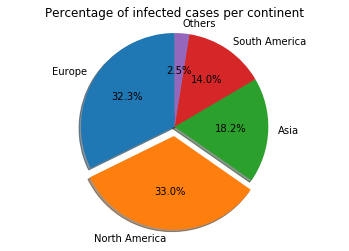

In [609]:
# visualizing question: What is the most Covid-19 affected continent in terms of infected cases?
labels = 'Europe', 'North America', 'Asia', 'South America', 'Others'
sizes = [total_cases_europe, total_cases_NA, total_cases_asia, total_cases_SA, (total_cases_afrika + total_cases_oceania)]
explode = (0, 0.1, 0, 0, 0)
fig, ax = plt.subplots ()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Percentage of infected cases per continent')
plt.show()

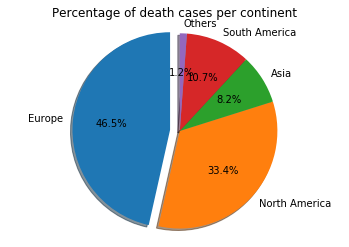

In [610]:
# visualizing question: What is the most Covid-19 affected continent in terms of infected cases?
labels = 'Europe', 'North America', 'Asia', 'South America', 'Others'
sizes = [total_deaths_europe, total_deaths_NA, total_deaths_asia, total_deaths_SA, (total_deaths_afrika + total_deaths_oceania)]
explode = (0.1, 0, 0, 0, 0)
fig, ax = plt.subplots ()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Percentage of death cases per continent')
plt.show()

### Conclusion: 
**As of the data available on the 31st of May 2020 - Europe is the most affected continent in terms of Covid-19 related deaths and North America is the most affected continenr in terms of Covid-19 infection cases.**

## Question2: *Do countries where BCG vaccine was widely implemented have higher life expectancy or lower infant mortality rate?*

**Vaccines play a central role in increasing life expectancy. We want to see whether Bacille Calmette–Guerin (BCG) vaccine alone has any correlation with life expectancy. The BCG vaccine is the most commonly used vaccine against tuberculosis (TB) worldwide. The vaccine is commonly given to infants under 1 years old.**

In [611]:
health_df_q2 = health_dfqs.copy()
health_df_q2.tail()

,country_region,bcg,life_expectancy,infant_mortality
175,Venezuela,82.0,71.0,27.9
176,Vietnam,97.0,74.4,15.7
177,Palestine,NaN,NaN,NaN
178,Zambia,99.0,53.6,56.0
179,Zimbabwe,90.0,62.3,30.3


In [612]:
# Viewing basic descriptive stats of BCG coverage
health_df_q2["bcg"].describe()

count    139.000000
mean      89.618705
std       14.147974
min       24.000000
25%       86.500000
50%       96.000000
75%       98.500000
max       99.000000
Name: bcg, dtype: float64

In [613]:
# Viewing basic descriptive stats of infant mortality
# Infant mortality rate is the number of deaths per 1,000 live births of children under one year of age. 
health_df_q2["infant_mortality"].describe()

count    164.000000
mean      20.842683
std       20.288738
min        1.700000
25%        5.300000
50%       11.650000
75%       30.325000
max      104.300000
Name: infant_mortality, dtype: float64

In [614]:
# Viewing basic descriptive stats of infant mortality
health_df_q2["life_expectancy"].describe()

count    164.000000
mean      73.467683
std        7.248634
min       52.800000
25%       68.800000
50%       75.250000
75%       78.525000
max       86.000000
Name: life_expectancy, dtype: float64

In [615]:
health_df_q2=health_df_q2.dropna()

In [616]:
# Checking how many countries we have in Health dataset
len(health_df_q2["country_region"].unique())

138

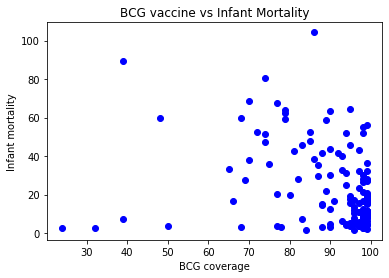

In [617]:
# show distribution of the results
plt.scatter(health_df_q2['bcg'], health_df_q2['infant_mortality'], color = 'blue')
plt.title("BCG vaccine vs Infant Mortality")
plt.xlabel("BCG coverage")
plt.ylabel("Infant mortality")
plt.show()

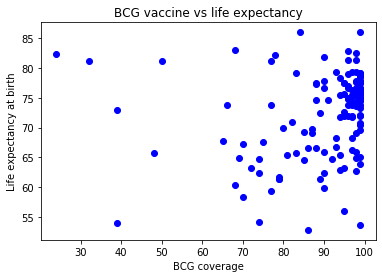

In [618]:
# show distribution of the results
plt.scatter(health_df_q2['bcg'], health_df_q2['life_expectancy'], color = 'blue')
plt.title("BCG vaccine vs life expectancy")
plt.xlabel("BCG coverage")
plt.ylabel("Life expectancy at birth")
plt.show()

In [619]:
# Printing out the correlation among columns
# Unsurpisingly, we have high negative correlation between life expectancy and infant mortality. 
# Only weak positive correlation between BCG coverage and life expectancy
health_df_q2.corr(method = "pearson")

,bcg,life_expectancy,infant_mortality
bcg,1.000000,0.203503,-0.282999
life_expectancy,0.203503,1.000000,-0.932175
infant_mortality,-0.282999,-0.932175,1.000000


In [620]:
# show that countries with higher bcg coverage have lower infant mortality rates
health_df_q2.loc[(health_df_q2['infant_mortality'] <= 10), ['country_region', 'bcg']]

,country_region,bcg
6,Argentina,99.0
9,Austria,90.0
15,Belarus,97.0
21,Bosnia and Herzegovina,95.0
24,Brunei,99.0
25,Bulgaria,96.0
35,Chile,93.0
40,Costa Rica,83.0
42,Croatia,98.0
43,Cuba,99.0


In [621]:
# show that even countries with higher bcg coverage often have lower life expectancy
health_df_q2.loc[(health_df_q2['life_expectancy'] <= 60), ['country_region', 'bcg']]

,country_region,bcg
0,Afghanistan,86.0
33,CAR,74.0
34,Chad,70.0
116,Mozambique,95.0
122,Niger,77.0
147,Sierra Leone,90.0
151,Somalia,39.0
178,Zambia,99.0


### **Conclusion:** 
**We see that BCG is really important to reduce infant mortality. However, the correlation between life expectancy and BCG is not strong. One possible explanation behind the inconclusive results is that BCG vaccine is not mandatory in more developed countries with lower risks of TB.**

## Question3: *Do countries where BCG vaccine was widely implemented have fewer infection rates per million?*

**The spread of COVID-19 and its impact varies across countries in the world. There were rumours that lower frequency of cases and mortalities can be attributed to Bacille Calmette–Guerin (BCG) vaccination. The BCG vaccine is the most commonly used vaccine against tuberculosis (TB) worldwide**

**Merging the two datasets**:

In [622]:
merged_df_q3 = covid19_dfqs.merge(health_dfqs, on = ['country_region']) 
merged_df_q3.head()

,continent,country_region,total_cases,total_deaths,total_cases_1M_pop,total_recovered,bcg,life_expectancy,infant_mortality
0,Europe,Russia,"405,843","4,693","2,781","171,883",96.0,71.9,6.5
1,Europe,Spain,"286,509","27,127","6,128","196,958",NaN,82.0,3.2
2,Europe,UK,"274,762","38,489","4,049",NaN,NaN,81.1,4.1
3,Europe,Italy,"232,997","33,415","3,853","157,507",NaN,82.5,3.2
4,Europe,France,"188,882","28,802","2,894","68,355",78.0,82.2,3.2


In [623]:
merged_df_q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 9 columns):
continent             171 non-null object
country_region        171 non-null object
total_cases           171 non-null object
total_deaths          155 non-null object
total_cases_1M_pop    171 non-null object
total_recovered       169 non-null object
bcg                   136 non-null float64
life_expectancy       161 non-null float64
infant_mortality      161 non-null float64
dtypes: float64(3), object(6)
memory usage: 13.4+ KB


In [624]:
# drop NaN values
merged_df_q3 = merged_df_q3.dropna()
merged_df_q3.shape

(122, 9)

In [625]:
# change dtype of only 1 column to float
merged_df_q3["total_cases_1M_pop"] = merged_df_q3["total_cases_1M_pop"].apply(lambda x: float(x.replace(',','')))
merged_df_q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 164
Data columns (total 9 columns):
continent             122 non-null object
country_region        122 non-null object
total_cases           122 non-null object
total_deaths          122 non-null object
total_cases_1M_pop    122 non-null float64
total_recovered       122 non-null object
bcg                   122 non-null float64
life_expectancy       122 non-null float64
infant_mortality      122 non-null float64
dtypes: float64(4), object(5)
memory usage: 9.5+ KB


In [626]:
merged_df_q3= merged_df_q3.sort_values(by=['total_cases_1M_pop'])
merged_df_q3.head()

,continent,country_region,total_cases,total_deaths,total_cases_1M_pop,total_recovered,bcg,life_expectancy,infant_mortality
160,Africa,Angola,86,4,3.0,18,79.0,61.3,62.3
161,Africa,Burundi,63,1,5.0,33,93.0,66.7,40.1
105,Asia,Syria,122,5,7.0,46,66.0,73.7,16.5
156,Africa,Mozambique,254,2,8.0,91,95.0,55.9,64.7
148,Africa,Tanzania,509,21,9.0,183,99.0,63.9,36.4


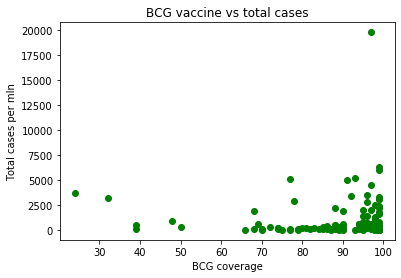

In [627]:
# show distribution of the results
plt.scatter(merged_df_q3['bcg'], merged_df_q3['total_cases_1M_pop'], color = 'green')

plt.title("BCG vaccine vs total cases")
plt.xlabel("BCG coverage")
plt.ylabel("Total cases per mln")
plt.show()

In [628]:
# Display the correlation table
merged_df_q3.corr(method = "pearson")

,total_cases_1M_pop,bcg,life_expectancy,infant_mortality
total_cases_1M_pop,1.000000,0.028947,0.323699,-0.283116
bcg,0.028947,1.000000,0.183783,-0.265631
life_expectancy,0.323699,0.183783,1.000000,-0.931667
infant_mortality,-0.283116,-0.265631,-0.931667,1.000000


### Conclusion: 
**We find no correlation between the BCG vaccination coverage and total number of Covid-19 cases per 1 million of population**

## Question4: *Do countries with higher life expectancy suffer more from Covid-19 in terms of deaths recorded?*


In [629]:
# Merging the datasets
merged_df_q4 = covid19_dfqs.merge(health_dfqs, on = ['country_region']) 
merged_df_q4.head()

,continent,country_region,total_cases,total_deaths,total_cases_1M_pop,total_recovered,bcg,life_expectancy,infant_mortality
0,Europe,Russia,"405,843","4,693","2,781","171,883",96.0,71.9,6.5
1,Europe,Spain,"286,509","27,127","6,128","196,958",NaN,82.0,3.2
2,Europe,UK,"274,762","38,489","4,049",NaN,NaN,81.1,4.1
3,Europe,Italy,"232,997","33,415","3,853","157,507",NaN,82.5,3.2
4,Europe,France,"188,882","28,802","2,894","68,355",78.0,82.2,3.2


In [630]:
#Selecting the columns we need
merged_df_q4 = merged_df_q4[["country_region","total_deaths","life_expectancy"]]
merged_df_q4.head()

,country_region,total_deaths,life_expectancy
0,Russia,"4,693",71.9
1,Spain,"27,127",82.0
2,UK,"38,489",81.1
3,Italy,"33,415",82.5
4,France,"28,802",82.2


In [631]:
merged_df_q4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 3 columns):
country_region     171 non-null object
total_deaths       155 non-null object
life_expectancy    161 non-null float64
dtypes: float64(1), object(2)
memory usage: 5.3+ KB


In [632]:
merged_df_q4= merged_df_q4.dropna()

In [633]:
merged_df_q4['total_deaths'] = merged_df_q4['total_deaths'].str.replace(',', '').astype(int)
merged_df_q4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 168
Data columns (total 3 columns):
country_region     147 non-null object
total_deaths       147 non-null int32
life_expectancy    147 non-null float64
dtypes: float64(1), int32(1), object(1)
memory usage: 4.0+ KB


In [634]:
merged_df_q4= merged_df_q4.sort_values("total_deaths",ascending=False)
merged_df_q4.head()

,country_region,total_deaths,life_expectancy
43,USA,106195,80.3
2,UK,38489,81.1
3,Italy,33415,82.5
109,Brazil,29314,74.7
4,France,28802,82.2


In [635]:
#Removing the outliers #method 1
#merged_df_q4["total_deaths"] = merged_df_q4["total_deaths"][merged_df_q4["total_deaths"].between(merged_df_q4["total_deaths"].quantile(.05), merged_df_q4["total_deaths"].quantile(.95))] 

In [636]:
# Removing the outliers #method 2
merged_df_q4["total_deaths"] = merged_df_q4["total_deaths"][merged_df_q4["total_deaths"].between(merged_df_q4["total_deaths"].quantile(.05), merged_df_q4["total_deaths"].quantile(.95))] 
q_low = merged_df_q4['total_deaths'].quantile(0.01)
q_hi  = merged_df_q4['total_deaths'].quantile(0.99)

merged_df_q4 = merged_df_q4[(merged_df_q4['total_deaths'] < q_hi) & (merged_df_q4['total_deaths'] > q_low)]
merged_df_q4.head()

,country_region,total_deaths,life_expectancy
44,Canada,7295.0,83.4
7,Netherlands,5956.0,81.7
65,India,5408.0,69.7
0,Russia,4693.0,71.9
69,China,4634.0,76.1


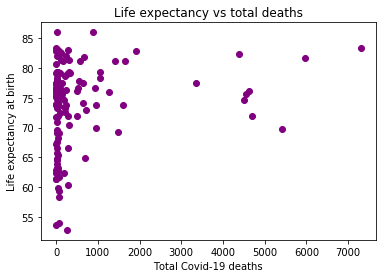

In [637]:
# show distribution of the results
plt.scatter(merged_df_q4["total_deaths"], merged_df_q4["life_expectancy"], color = 'purple')

plt.title("Life expectancy vs total deaths")
plt.xlabel("Total Covid-19 deaths")
plt.ylabel("Life expectancy at birth")
plt.show()

In [638]:
# Display the correlation table
merged_df_q4.corr(method="pearson")

,total_deaths,life_expectancy
total_deaths,1.000000,0.192885
life_expectancy,0.192885,1.000000


In [639]:
# Displaying the regression table
X = merged_df_q4["life_expectancy"]
y = merged_df_q4["total_deaths"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total_deaths   R-squared (uncentered):                   0.177
Model:                            OLS   Adj. R-squared (uncentered):              0.170
Method:                 Least Squares   F-statistic:                              27.29
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    6.97e-07
Time:                        00:04:41   Log-Likelihood:                         -1098.4
No. Observations:                 128   AIC:                                      2199.
Df Residuals:                     127   BIC:                                      2202.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
life_expectancy     8.0718      1.545      5.224      0.000       5.014      11.130
==============================================================================
Omnibus:                      109.193   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              755.523
Skew:                           3.217   Prob(JB):                    8.71e-165
Kurtosis:                      13.013   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion
**We do not observe a strong correlation between the number of total deaths and the life expectancy at birth.**

## Question5: *What country has the highest ratio of recovered cases?*


In [640]:
# Creating a copy of the dataset for the question 5
covid19_df_q5 = covid19_dfqs.copy()

In [641]:
# Selecting the data we need
covid19_df_q5 = covid19_df_q5[['country_region','total_cases','total_recovered',]]
covid19_df_q5.head()

,country_region,total_cases,total_recovered
0,Russia,"405,843","171,883"
1,Spain,"286,509","196,958"
2,UK,"274,762",NaN
3,Italy,"232,997","157,507"
4,France,"188,882","68,355"


In [642]:
# Checking the number of rows and columns
covid19_df_q5.shape

(213, 3)

In [643]:
# Information about the df
covid19_df_q5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 3 columns):
country_region     213 non-null object
total_cases        213 non-null object
total_recovered    211 non-null object
dtypes: object(3)
memory usage: 5.1+ KB


In [644]:
# Dropping missing values
covid19_df_q5 = covid19_df_q5.dropna()

In [645]:
# Transforming object(str) to int
covid19_df_q5['total_cases'] = covid19_df_q5['total_cases'].str.replace(',', '').astype(int)

In [646]:
# Transforming object(str) to int
covid19_df_q5['total_recovered'] = covid19_df_q5['total_recovered'].str.replace(',', '').astype(int)

In [647]:
# Double checking that objects have been transformed to int
covid19_df_q5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 212
Data columns (total 3 columns):
country_region     211 non-null object
total_cases        211 non-null int32
total_recovered    211 non-null int32
dtypes: int32(2), object(1)
memory usage: 4.9+ KB


In [648]:
# We can see what in some countries total cases = total recovered
covid19_df_q5.tail()

,country_region,total_cases,total_recovered
208,New Zealand,1504,1481
209,French Polynesia,60,60
210,New Caledonia,19,18
211,Fiji,18,15
212,Papua New Guinea,8,8


In [649]:
# Checking what countries have more than 5000 total cases.
# It allows us to consider countries that had bigger outbreaks. 
covid19_df_q5["Cases>5000"]= covid19_df_q5['total_cases'] > 5000
covid19_df_q5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 212
Data columns (total 4 columns):
country_region     211 non-null object
total_cases        211 non-null int32
total_recovered    211 non-null int32
Cases>5000         211 non-null bool
dtypes: bool(1), int32(2), object(1)
memory usage: 5.2+ KB


In [650]:
# We are only left with 67 countries that have more than 5000 
covid19_df_q5 = covid19_df_q5[covid19_df_q5['Cases>5000'] == True] 
covid19_df_q5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 207
Data columns (total 4 columns):
country_region     67 non-null object
total_cases        67 non-null int32
total_recovered    67 non-null int32
Cases>5000         67 non-null bool
dtypes: bool(1), int32(2), object(1)
memory usage: 1.6+ KB


In [651]:
# Adding a new column that corresponds to recovery rate
# Transforming it to rounded percentage number
# Changing it from float to int
covid19_df_q5["recovery_rate"]= covid19_df_q5["total_recovered"]/covid19_df_q5["total_cases"]
covid19_df_q5["recovery_rate"] = (covid19_df_q5["recovery_rate"] * 100).round()
covid19_df_q5["recovery_rate"] = covid19_df_q5["recovery_rate"].dropna().astype('int')
covid19_df_q5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 207
Data columns (total 5 columns):
country_region     67 non-null object
total_cases        67 non-null int32
total_recovered    67 non-null int32
Cases>5000         67 non-null bool
recovery_rate      67 non-null int32
dtypes: bool(1), int32(3), object(1)
memory usage: 1.9+ KB


In [652]:
covid19_df_q5.head()

,country_region,total_cases,total_recovered,Cases>5000,recovery_rate
0,Russia,405843,171883,True,42
1,Spain,286509,196958,True,69
3,Italy,232997,157507,True,68
4,France,188882,68355,True,36
5,Germany,183494,165200,True,90


In [653]:
# First prepare your dataframe, e.g. sort so x and y will align properly
XY = covid19_df_q5.sort_values('recovery_rate', ascending=False)
XY.head()

,country_region,total_cases,total_recovered,Cases>5000,recovery_rate
91,China,83001,78304,True,94
16,Austria,16731,15593,True,93
207,Australia,7195,6614,True,92
20,Norway,8440,7727,True,92
11,Switzerland,30862,28500,True,92


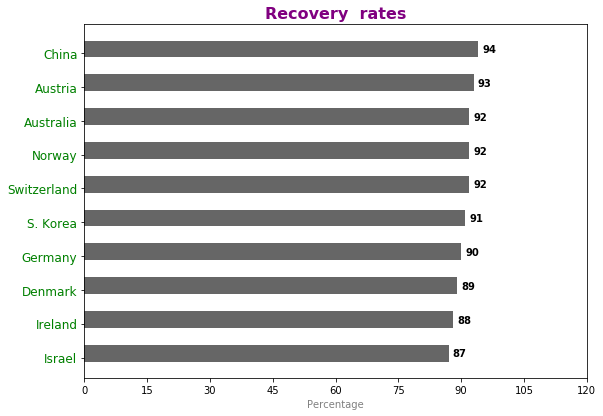

In [654]:
# Displaying the results
# In this specific case x and y axis should be treated together in a dataframe and not munipulated apart. 

x = XY['country_region']
y = XY['recovery_rate'][:10]

fig, ax = plt.subplots(figsize=(9, 6.5)) 
width = 0.5 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="0.4")
ax.set_yticks(ind+width/4)
for i, v in enumerate(y): # adding numbers to every line
        ax.text(v + 1, i + .1, str(v), color='black', fontweight='bold')
ax.set_yticklabels(x,color = "green", fontsize = 12, minor=False)
plt.xticks(range(0,125,15))
plt.title("Recovery  rates",color = "purple", fontsize = 16, fontweight="bold")
plt.xlabel("Percentage", color = "gray")
plt.gca().invert_yaxis()
plt.show()

### Conclusion

**China has the highest percentage of recovered cases among countries with more than 5000 cases.**